In [78]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.datasets import make_regression

from sklearn.ensemble import BaggingRegressor

from sklearn.tree import DecisionTreeRegressor

In [79]:
# Generate synthetic data

X,y = make_regression(n_samples=500, n_features=1, noise=20, random_state=42)

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [80]:
# Fit a Single Decision Tree

single_tree = DecisionTreeRegressor(random_state=42)

single_tree.fit(X_train,y_train)

y_pred_tree = single_tree.predict(X_test)

In [81]:
# Fit a Bagging Regressor

bagging_model = BaggingRegressor(
    estimator = DecisionTreeRegressor(),
    n_estimators= 50, # Number of models
    random_state=42
)

In [82]:
bagging_model.fit(X_train,y_train)

y_pred_bagging = bagging_model.predict(X_test)

In [83]:
# Plot predictions

plt.figure(figsize=(14,7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

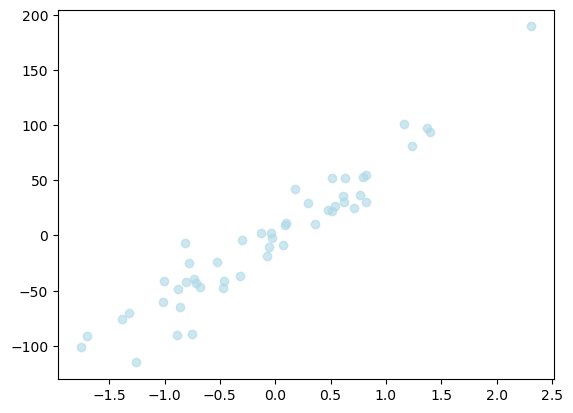

In [84]:
# Original Data

plt.scatter(X_test[:50], y_test[:50], color="lightblue", label="True Values", alpha=0.6)


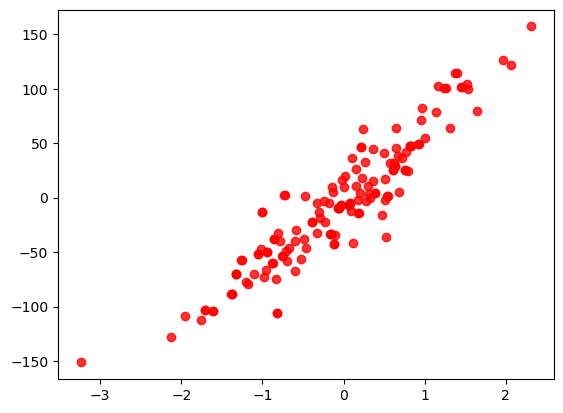

In [85]:
# Single Decision Tree Predictions

plt.scatter(X_test, y_pred_tree, color="red", label="Single Decision Tree Predictions", alpha=0.8)


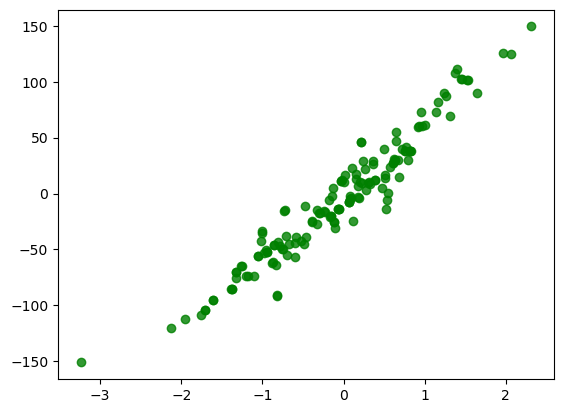

In [86]:
# Bagging Predictions
plt.scatter(X_test, y_pred_bagging, color="green", label="Bagging Predictions", alpha=0.8)


In [87]:
print(X_test[:5])  # Check first few test values
print(y_test[:5])  # Check first few true values
print(y_pred_tree[:5])  # Check first few predictions from the tree
print(y_pred_bagging[:5])  # Check first few predictions from bagging model


[[ 0.54256004]
 [-0.52575502]
 [ 0.18334201]
 [-0.8612842 ]
 [ 0.6141667 ]]
[ 26.77586388 -24.06031297  42.47615228 -64.53149796  36.20938849]
[  1.70155662 -56.04593368 -14.45708165 -38.41858807  25.756232  ]
[  0.80608468 -42.28620082  -3.21135396 -45.72913031  27.72830346]


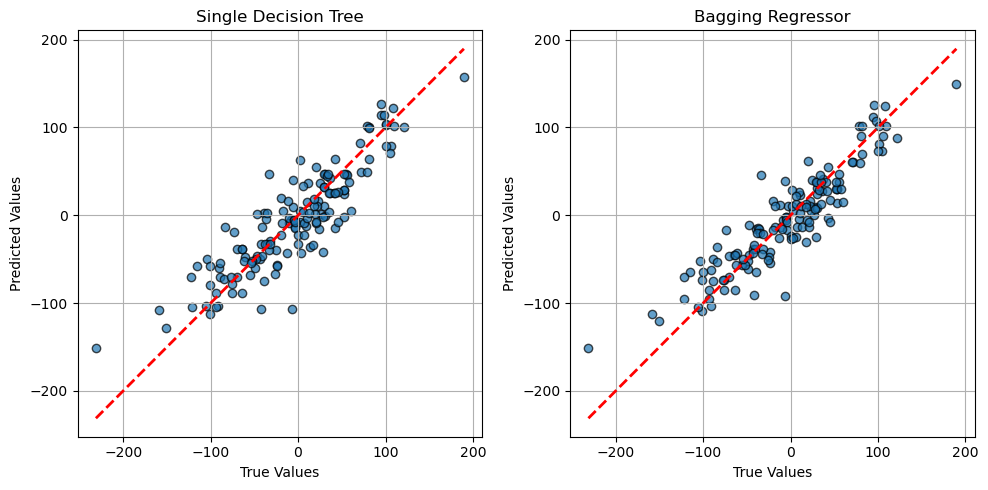

In [88]:
# Scatter plot for single Decision Tree predictions
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_tree, alpha=0.7, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Single Decision Tree")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.grid(True)

# Scatter plot for Bagging Regressor predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_bagging, alpha=0.7, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Bagging Regressor")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.grid(True)

plt.tight_layout()
plt.show()
